# Machine Learning With Gradient Boosting

In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import dataset
df = pd.read_csv("../diabetes_preprocessed.csv")
# Display first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_Group,z_score_insulin,Insulin_normalized
0,6,148.0,72.0,35.000,180.385,33.6,0.627,50,1,50-59,0.225682,0.368925
1,1,85.0,66.0,29.000,53.720,26.6,0.351,31,0,30-39,-1.005301,0.088071
2,8,183.0,64.0,19.665,250.925,23.3,0.672,32,1,30-39,0.911218,0.525333
3,1,89.0,66.0,23.000,94.000,28.1,0.167,21,0,20-29,-0.613843,0.177384
4,0,137.0,40.0,35.000,168.000,43.1,2.288,33,1,30-39,0.105319,0.341463


In [2]:
# Split dataset into features and target variable
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [4]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the size of training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 599
Testing set size: 150


In [5]:
# Scale features
label_encoder = LabelEncoder()
X_train['Age_Group'] = label_encoder.fit_transform(X_train['Age_Group'])
X_test['Age_Group'] = label_encoder.transform(X_test['Age_Group'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Create and train Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Create the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Analyze model performance
train_accuracy = gb_model.score(X_train_scaled, y_train)
print(f"Accuracy in training set: {train_accuracy:.4f}")

# Modelin test setindeki doğruluğunu yazdır
test_accuracy = gb_model.score(X_test_scaled, y_test)
print(f"Accuracy in testing set: {test_accuracy:.4f}")

# Predict on the test set
y_pred = gb_model.predict(X_test_scaled)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy in training set: 0.9449
Accuracy in testing set: 0.7267

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.64      0.45      0.53        51

    accuracy                           0.73       150
   macro avg       0.70      0.66      0.67       150
weighted avg       0.72      0.73      0.71       150



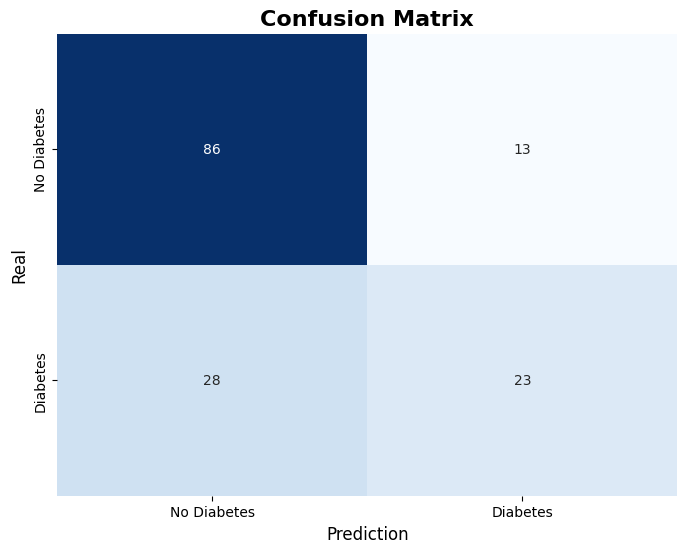

In [9]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

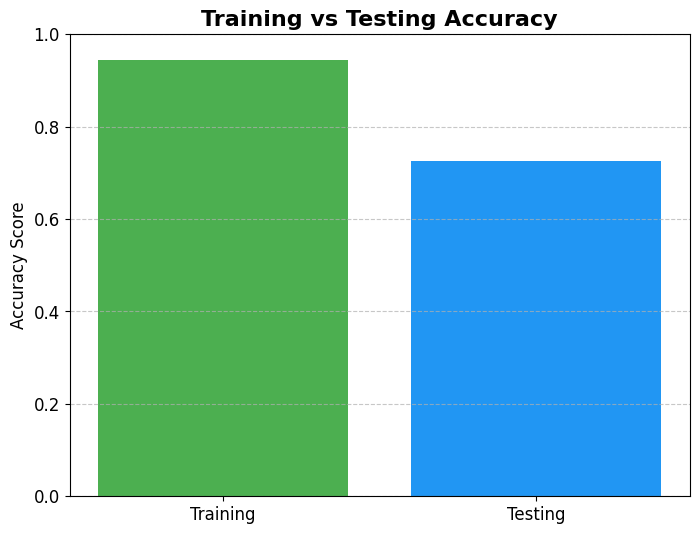

In [10]:
# Accuracy Bar Plot
plt.figure(figsize=(8, 6))
plt.bar(['Training', 'Testing'], [accuracy_score(y_train, gb_model.predict(X_train_scaled)), accuracy_score(y_test, y_pred)], color=['#4CAF50', '#2196F3'])
plt.title('Training vs Testing Accuracy', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

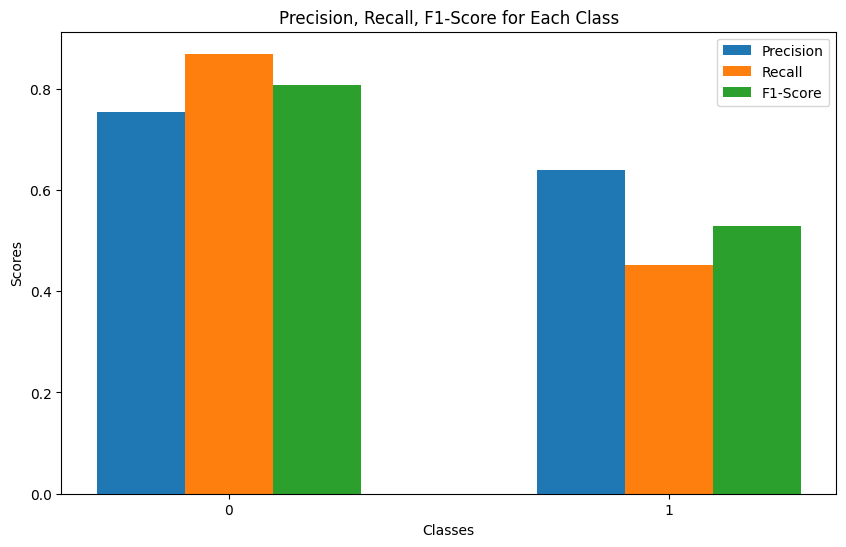

In [11]:
# Detailed Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)

classes = list(report.keys())[:-3]  
metrics = ["precision", "recall", "f1-score"]

# Organize data for plotting
values = {metric: [report[class_][metric] for class_ in classes] for metric in metrics}
support = [report[class_]["support"] for class_ in classes]

# Plotting
x = np.arange(len(classes))  # Class indices
width = 0.2  # Width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width, values["precision"], width, label="Precision")
plt.bar(x, values["recall"], width, label="Recall")
plt.bar(x + width, values["f1-score"], width, label="F1-Score")

# Adding labels and title
plt.xticks(x, classes)
plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, F1-Score for Each Class")
plt.legend()
plt.show()


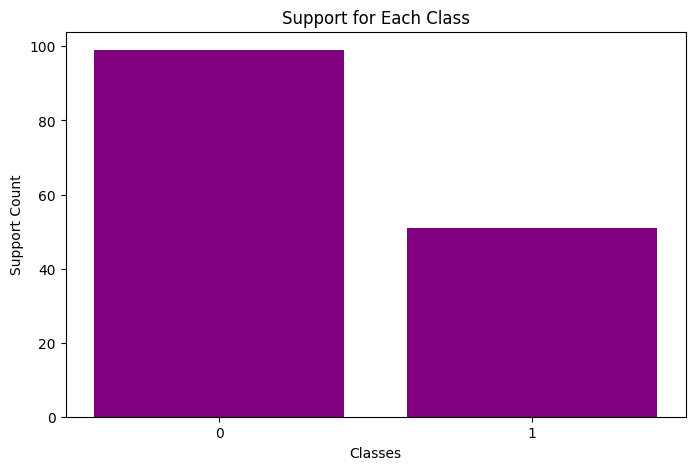

In [12]:
# Support Bar Plot
plt.figure(figsize=(8, 5))
plt.bar(classes, support, color='purple')
plt.title("Support for Each Class")
plt.xlabel("Classes")
plt.ylabel("Support Count")
plt.show()

In [14]:
# Save and Load Model
import joblib

# Save the model
joblib.dump(gb_model, 'diabetes_model_with_gradient_boosting.pkl')

# Load the model
loaded_model = joblib.load('diabetes_model_with_gradient_boosting.pkl')

# Predict with the loaded model
y_pred_loaded = loaded_model.predict(X_test_scaled)

# Evaluate loaded model
print("Loaded Model Evaluation:")
print(f"Accuracy {accuracy_score(y_test, y_pred_loaded):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_loaded))

Loaded Model Evaluation:
Accuracy 0.7267
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        99
           1       0.64      0.45      0.53        51

    accuracy                           0.73       150
   macro avg       0.70      0.66      0.67       150
weighted avg       0.72      0.73      0.71       150

